In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb




In [153]:
dataMat = pd.read_csv('student/student-mat.csv', sep=';')
dataPor = pd.read_csv('student/student-por.csv', sep=';')

In [154]:
data = pd.concat([dataMat, dataPor])

In [155]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [156]:
data.duplicated().any()

np.False_

In [157]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [158]:
data.describe(include = object)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,673


In [159]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [160]:
cleanup_nums = {
    "yes": 1, "no": 0, 
    "F": 1, "M": 0, 
    "GP": 1, "MS": 0, 
    "R": 1, "U": 0, 
    "GT3": 1, "LE3": 0, 
    "A": 1, "T": 0
}

data.replace(cleanup_nums, inplace=True)

data = pd.get_dummies(data, columns=["Mjob", "Fjob", "reason", "guardian"])

C:\Users\Stacy1KelvinNotebook\AppData\Local\Temp\ipykernel_12708\2852053941.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(cleanup_nums, inplace=True)


In [161]:
X = data.drop(columns=["G3"])

y = data["G3"]


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [163]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor()

}


results_list = []

for model_name, model in models.items():

    y_pred = cross_val_predict(model, X_train, y_train, cv=10)

    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)

    results_list.append({
    "Model": model_name,
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R² Score": r2
    })

results = pd.DataFrame(results_list)

In [164]:
print(results)


               Model       MAE       MSE      RMSE  R² Score
0  Linear Regression  0.988353  2.358901  1.535872  0.839495
1      Random Forest  0.936805  2.122585  1.456910  0.855574
2  Gradient Boosting  0.877168  1.919580  1.385489  0.869387
3            XGBoost  0.998137  2.504236  1.582478  0.829606


Feature Selection

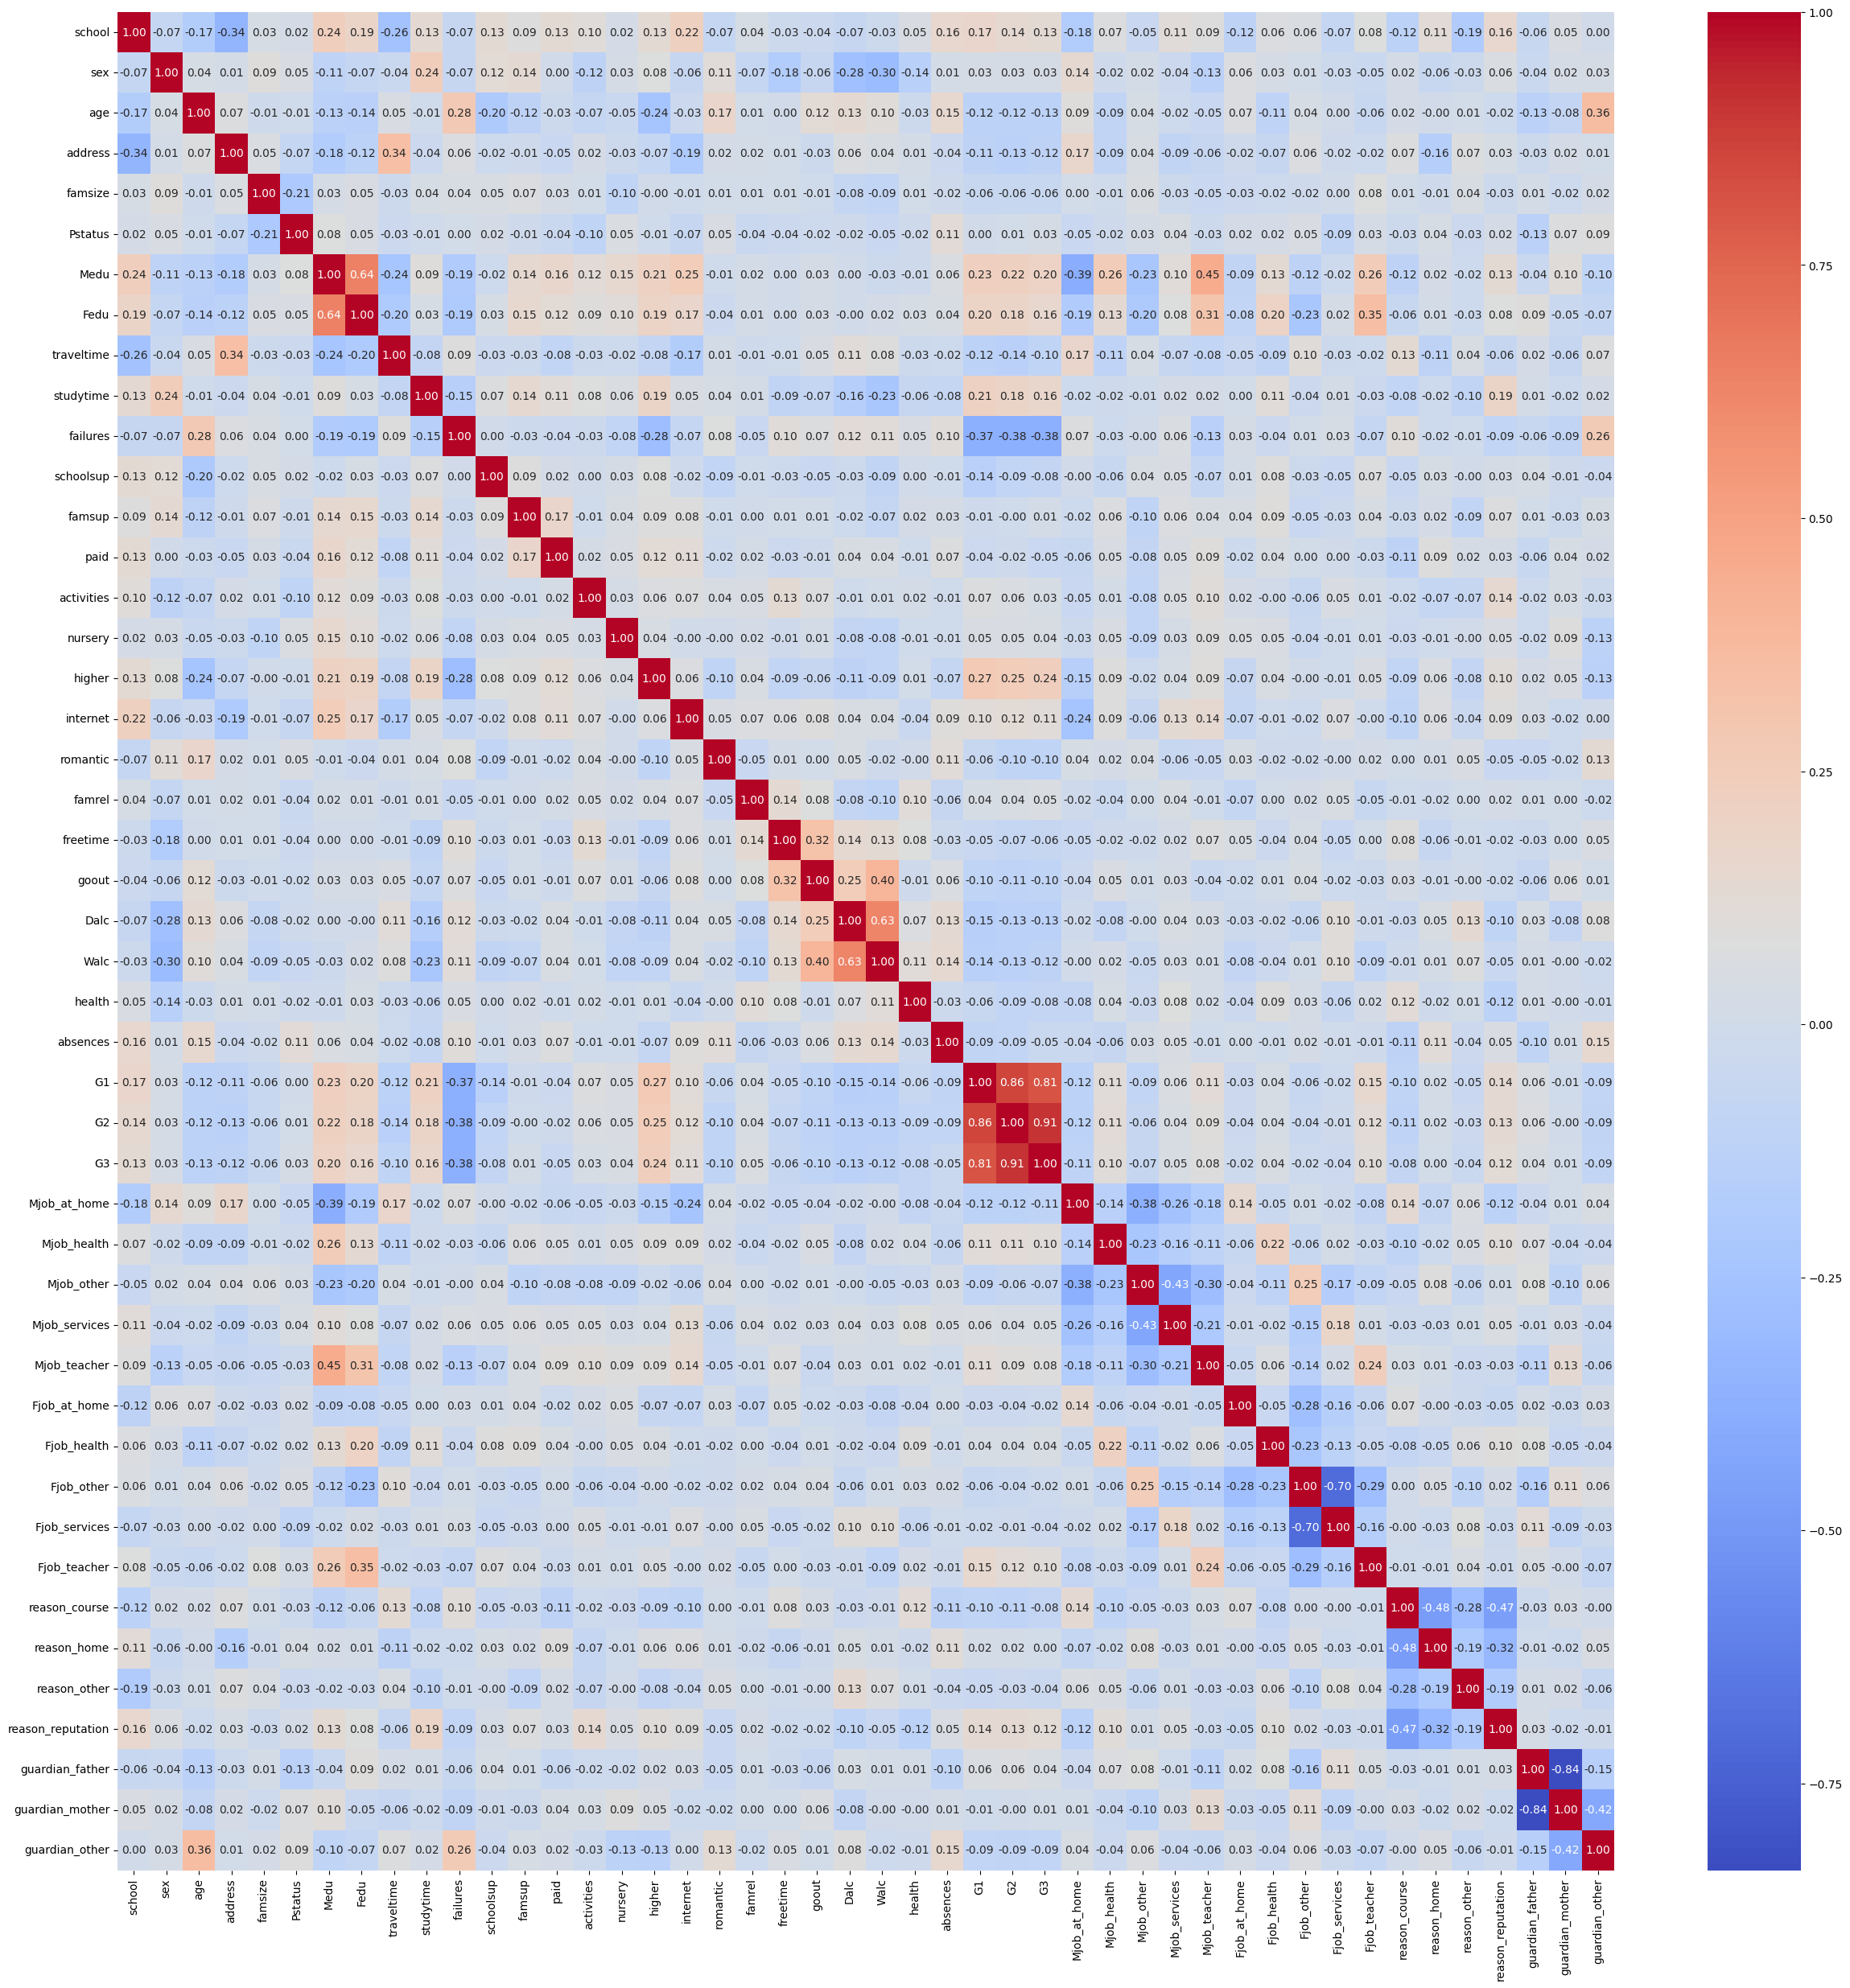

In [165]:
plt.figure(figsize=(30, 30))  
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


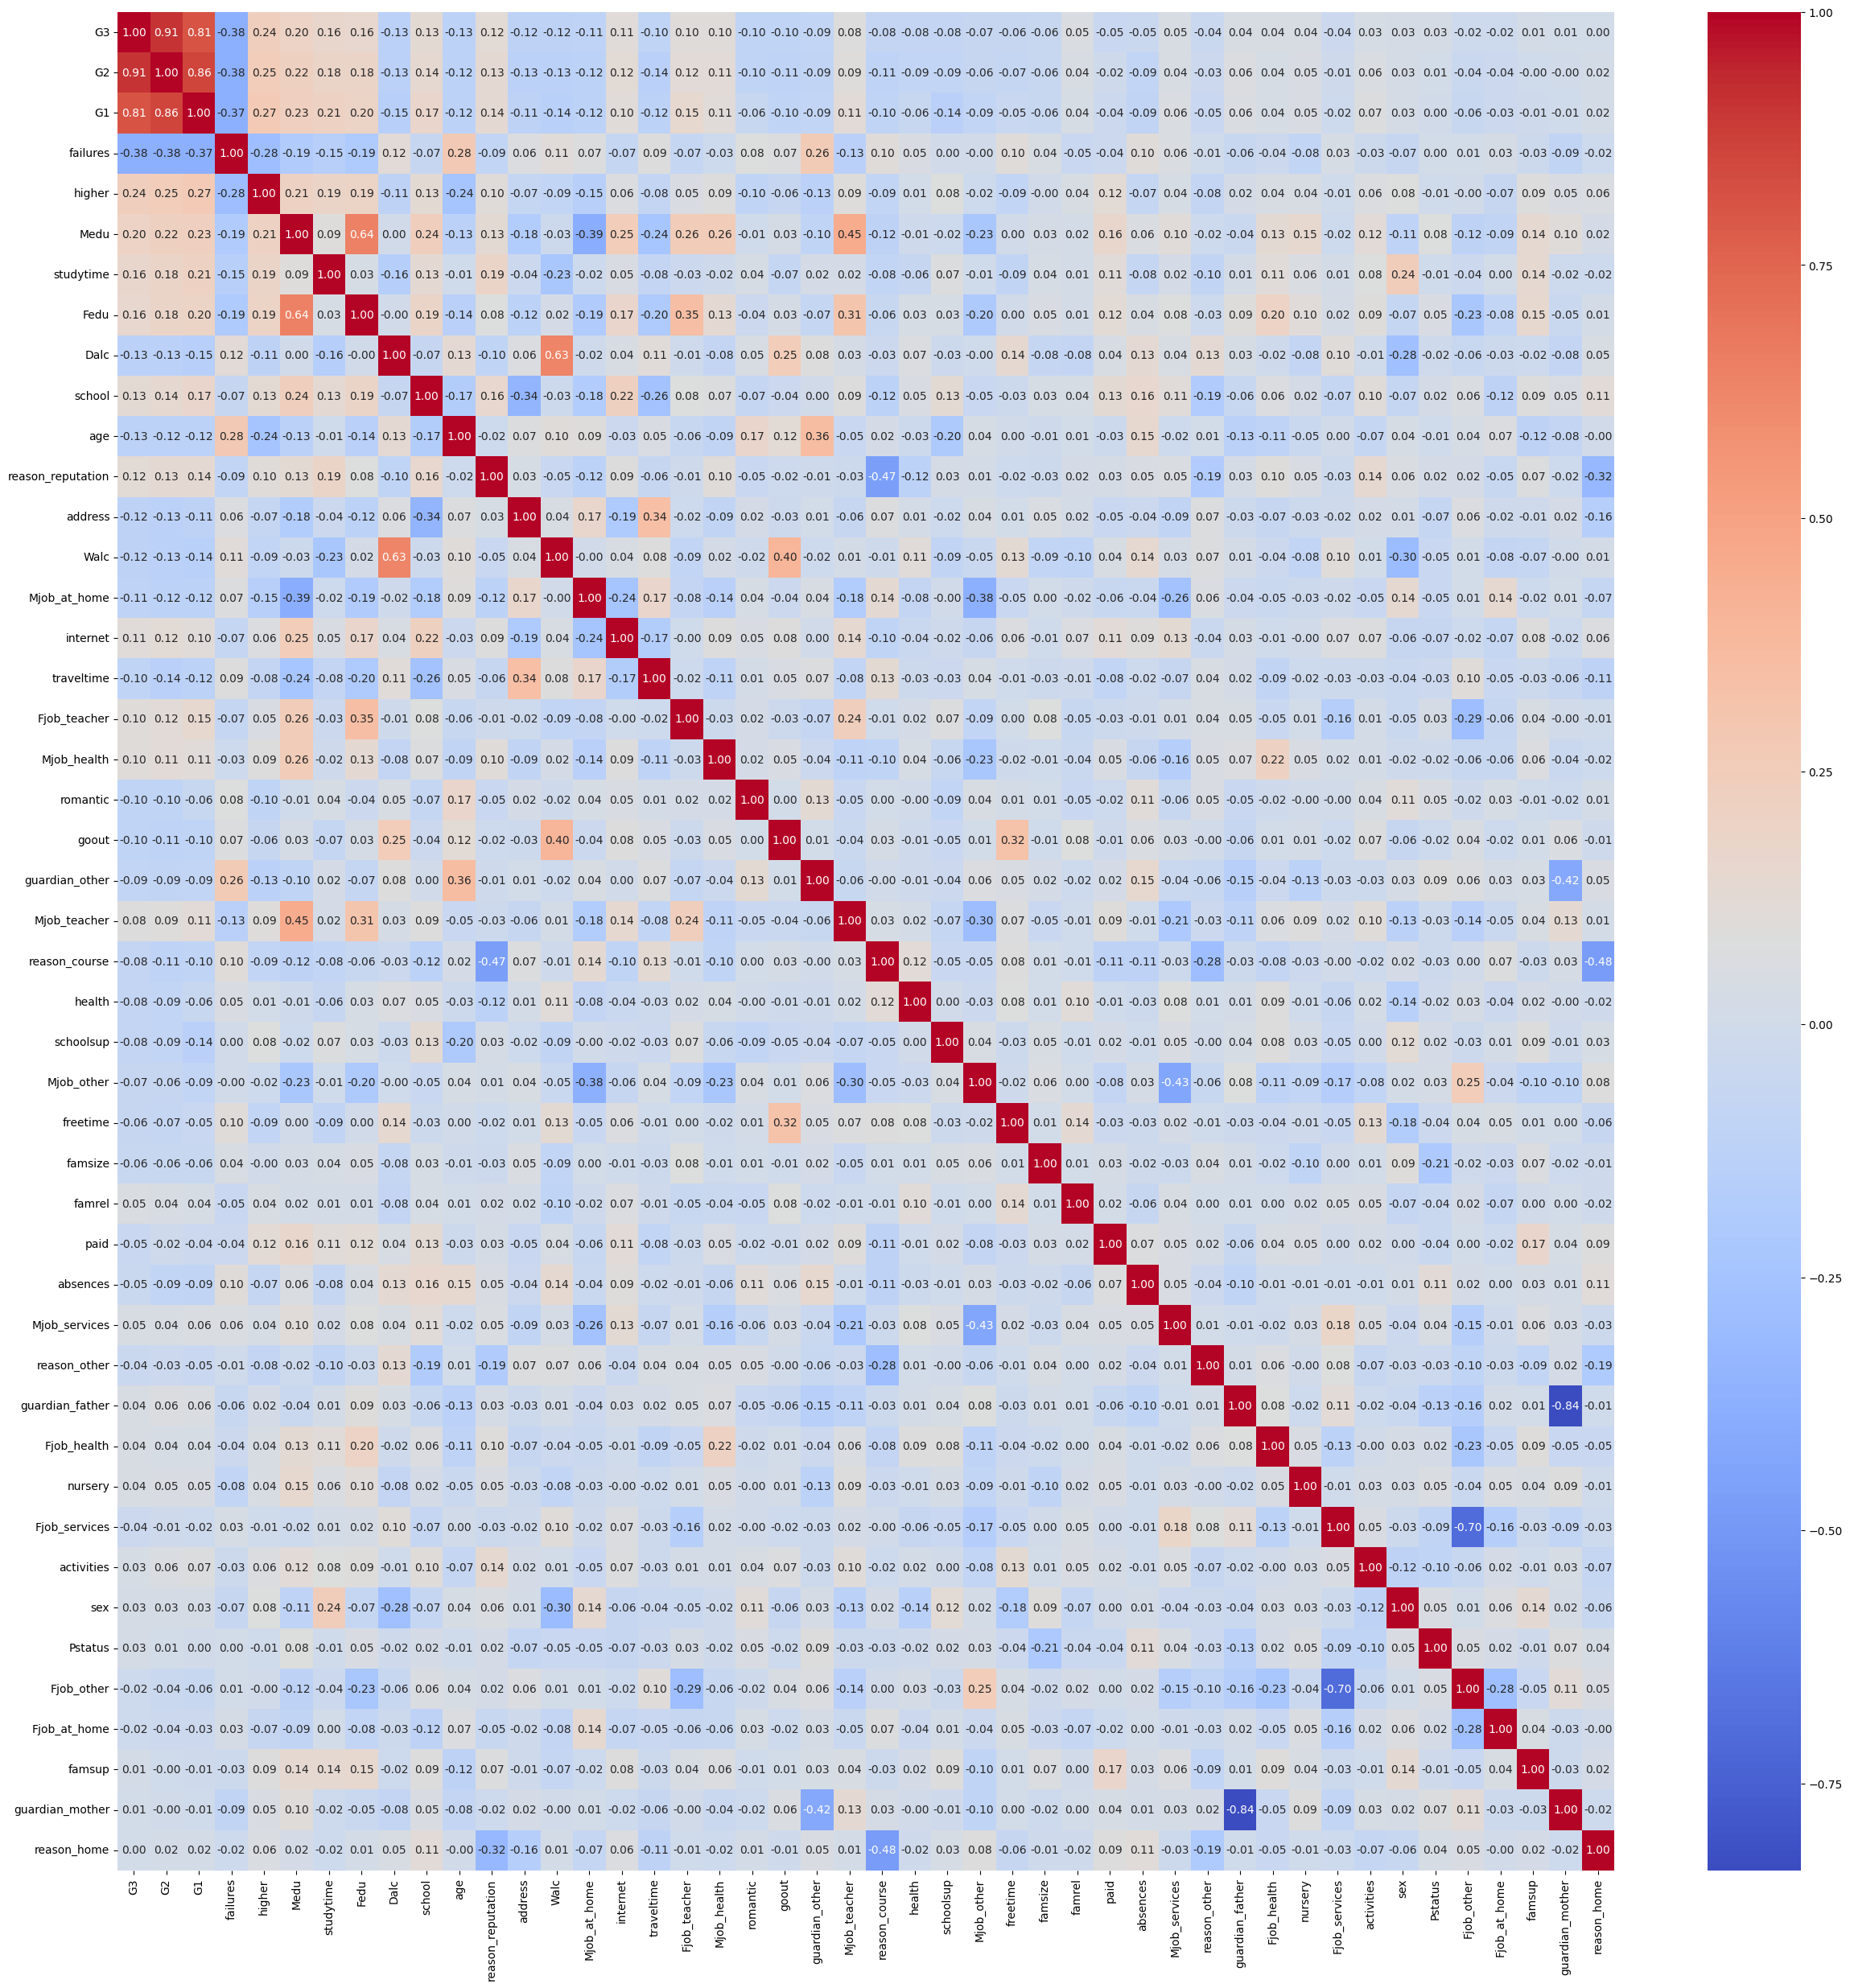

In [166]:
plt.figure(figsize=(30, 30))
corr_matrix = data.corr()
sorted_corr = corr_matrix["G3"].abs().sort_values(ascending=False)
sns.heatmap(data[sorted_corr.index].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [167]:
df = data.drop(['reason_home','guardian_mother', 'famsup','Fjob_at_home','Fjob_other','Pstatus','sex','activities','Fjob_services','nursery',
                'Fjob_health','guardian_father','reason_other','Mjob_services','absences','paid','famrel','famsize','freetime','Mjob_other','schoolsup','health'], axis=1)

In [168]:
X_df = df.drop('G3', axis=1)
y_df = df['G3']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [170]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor()

}


results_list = []

for model_name, model in models.items():

    y_pred = cross_val_predict(model, X_train, y_train, cv=10)

    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)

    results_list.append({
    "Model": model_name,
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R² Score": r2
    })

results_features_selection = pd.DataFrame(results_list)

In [172]:
print(results_features_selection)

               Model       MAE       MSE      RMSE  R² Score
0  Linear Regression  0.954874  2.436591  1.560958  0.834944
1      Random Forest  1.043354  3.039802  1.743503  0.794082
2  Gradient Boosting  0.982356  2.650233  1.627954  0.820472
3            XGBoost  1.155740  3.572853  1.890199  0.757973


**Conclusion**

Feature selection negatively impacted model performance, especially for Random Forest, Gradient Boosting, and XGBoost, which rely on all features. Linear Regression was the least affected.